In [48]:
import warnings
warnings.filterwarnings("ignore")
# from sklearn.preprocessing import StandardScalar
from utilities import *

In [9]:
label_mango,sequence_mango = readFastaFiles("mango_TA4_proteins.fasta")


In [10]:
len(label_mango)

5046

In [11]:
result_signalp_mango = resultSignalP("mango_signalp/prediction_results.txt")

In [12]:
unique, counts = np.unique(result_signalp_mango, return_counts=True)

In [13]:
print(np.asarray((unique, counts)).T)

[[   0 4653]
 [   1  393]]


In [14]:
#tape_data
mango_ebedding = np.load('sequence_mango.npy')

In [16]:
#ESM
embed2_mango = torch.load('embed2_mango.pt')

In [17]:
numpy_array_list = [tensor.numpy() for tensor in embed2_mango]
numpy_embed2_mango = np.array(numpy_array_list)

In [19]:
numpy_embed2_mango.shape

(5046, 1, 1280)

In [20]:
mango_ebedding2 = numpy_embed2_mango.reshape(numpy_embed2_mango.shape[0],numpy_embed2_mango.shape[2])


In [22]:
mango_ebedding2.shape

(5046, 1280)

In [24]:
len(embed2_mango)

5046

In [30]:
embedding_padded = np.concatenate((mango_ebedding, np.zeros((mango_ebedding.shape[0],16))), axis=1)
embedding2_padded = np.concatenate((mango_ebedding2, np.zeros((mango_ebedding2.shape[0],16))), axis=1)

In [34]:
shape_unit=28
embedding_images=np.reshape(embedding_padded,(embedding_padded.shape[0],shape_unit,shape_unit))

print(embedding_images.shape)

(5046, 28, 28)


In [36]:
shape_unit=36
embedding2_images=np.reshape(embedding2_padded,(embedding2_padded.shape[0],shape_unit,shape_unit))

print(embedding2_images.shape)

(5046, 36, 36)


In [ ]:
embedding_geotop = geotop_analysis(embedding_images)

In [38]:
#28*28
np.savez("embedding_geotop_mango.npz", *embedding_geotop)

In [ ]:
#36*36
embedding2_geotop = geotop_analysis(embedding2_images)

In [40]:
np.savez("embedding2_geotop_mango.npz", *embedding2_geotop)

## Trainning

In [80]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding_geotop)

In [81]:
dim = 1024
result = concate_embedding_geotop(mango_ebedding,dgms,dim)

In [82]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp_mango[:num_train_samples], result_signalp_mango[num_train_samples:]

In [83]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [84]:
shape_unit=32
std_scale = skp.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [85]:
std_scale = skp.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [86]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [87]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3727]
 [   1  309]]


In [88]:
train_data.shape

(4036, 32, 32, 1)

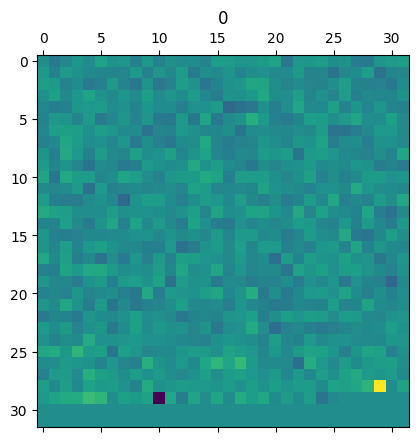

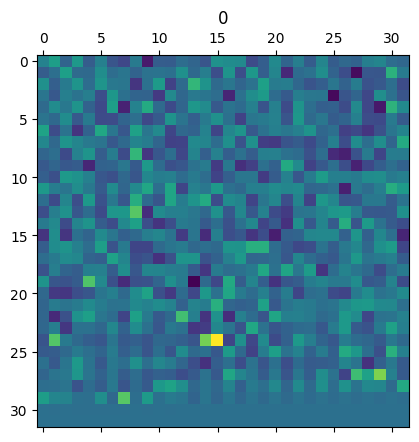

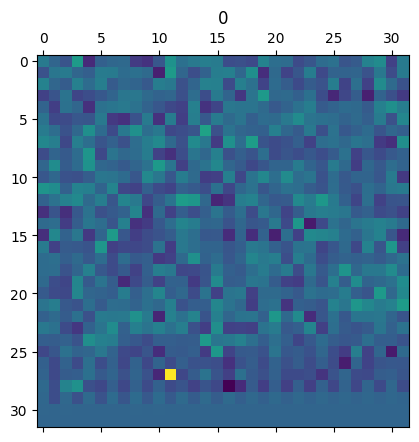

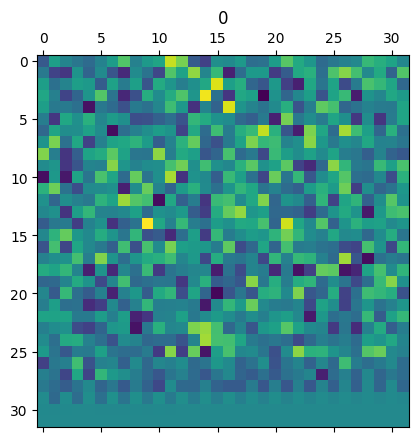

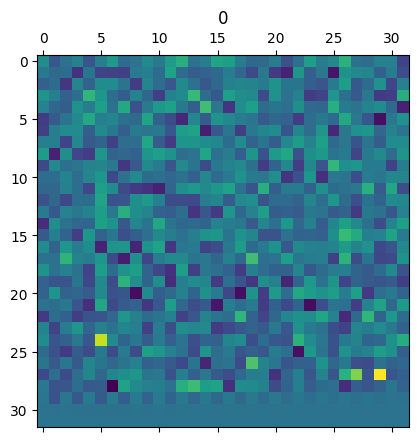

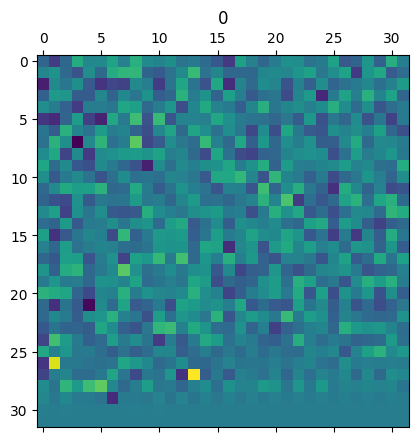

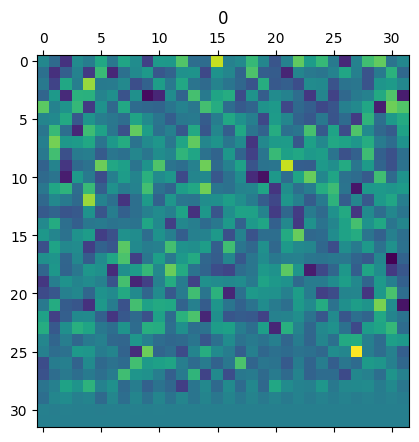

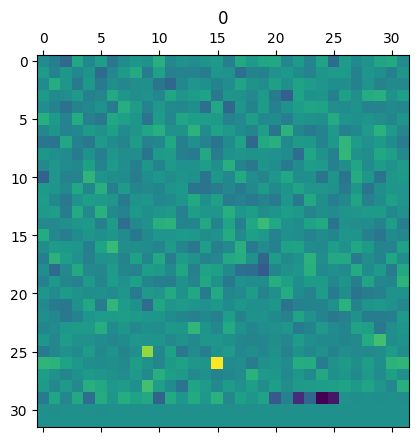

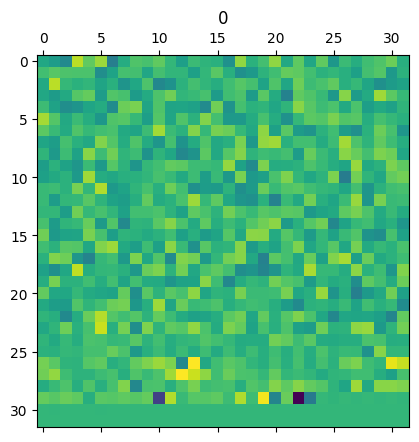

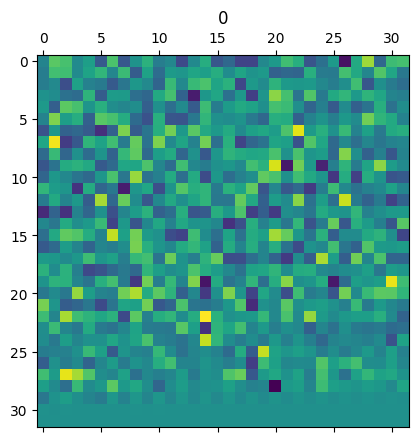

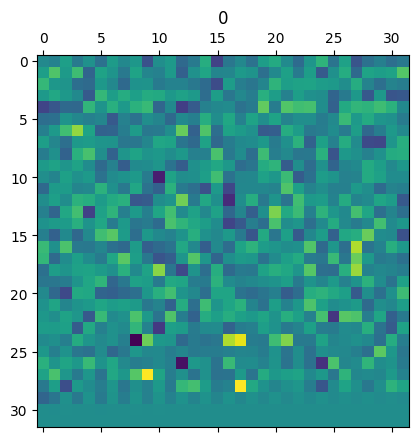

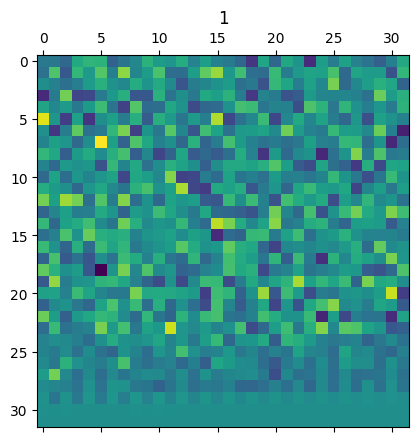

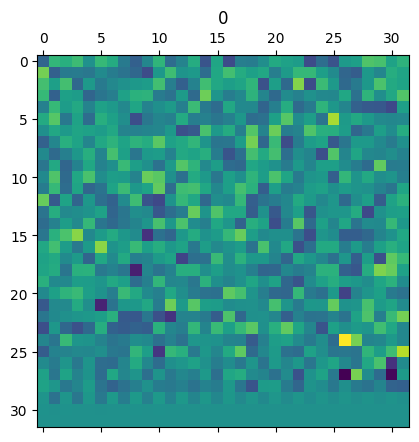

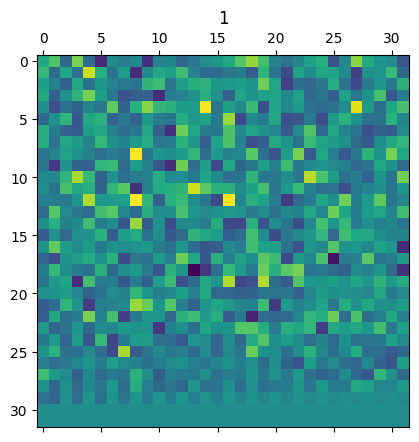

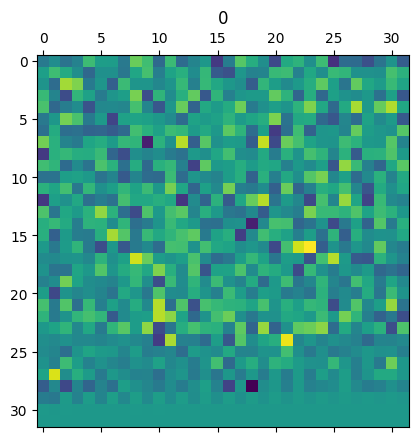

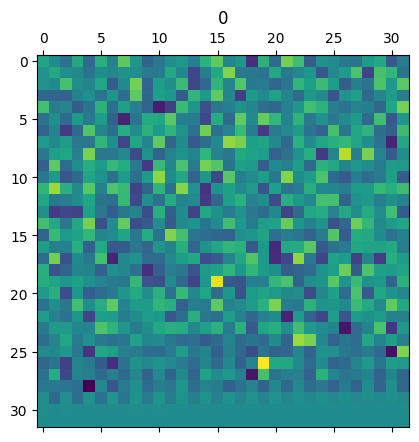

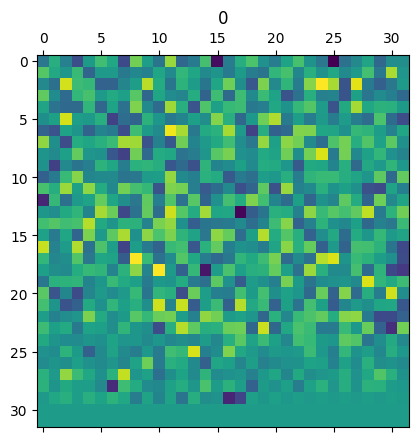

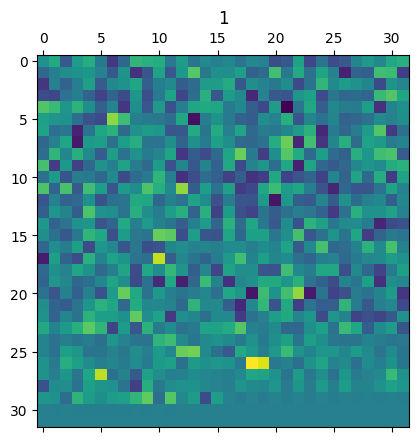

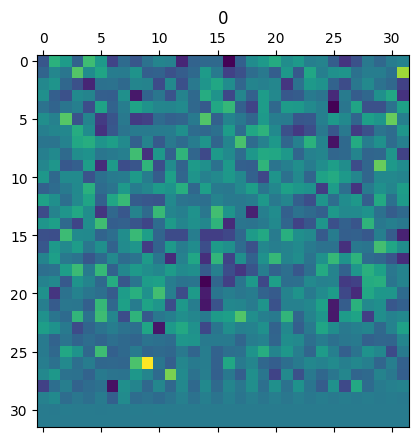

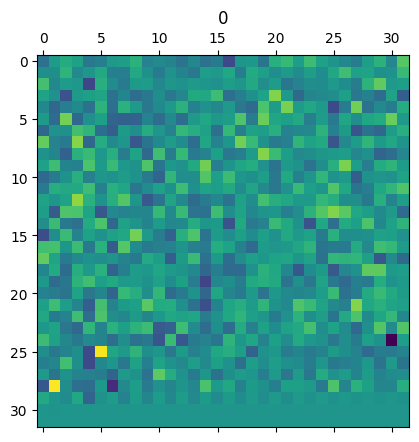

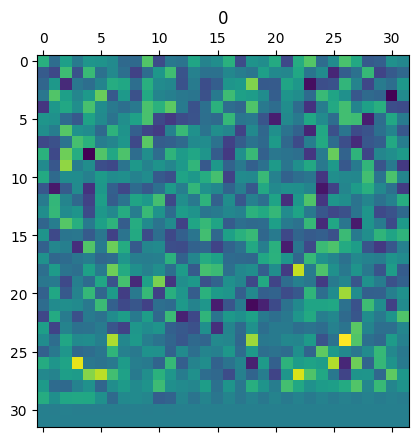

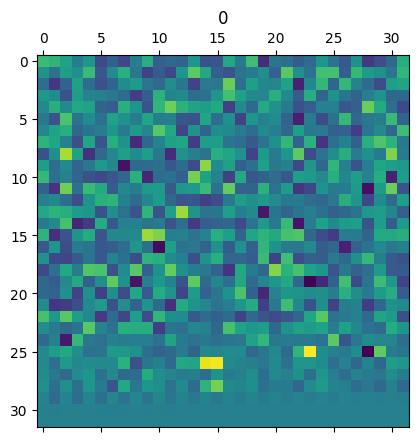

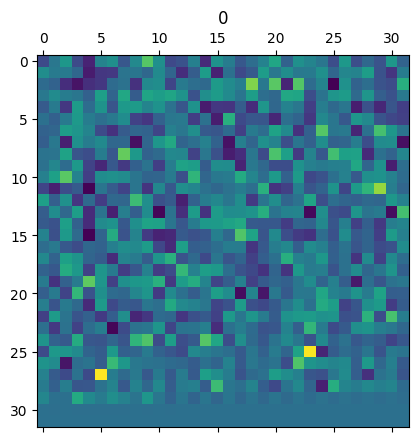

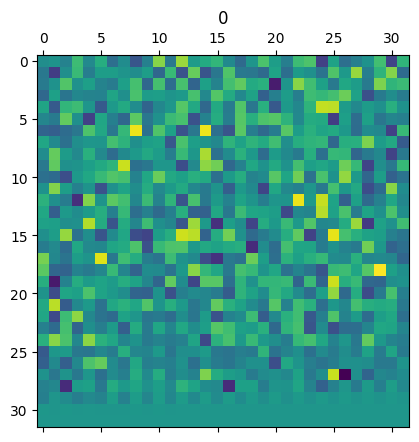

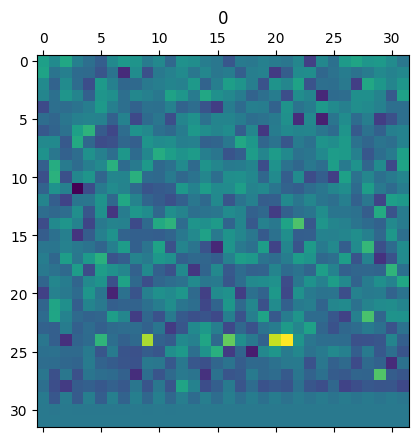

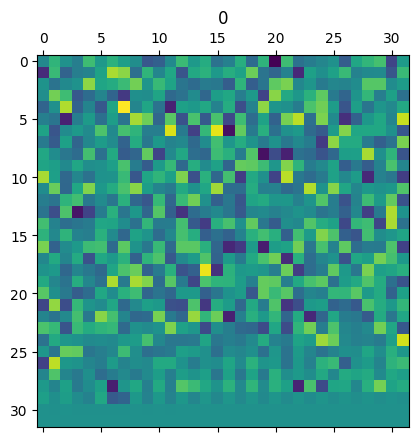

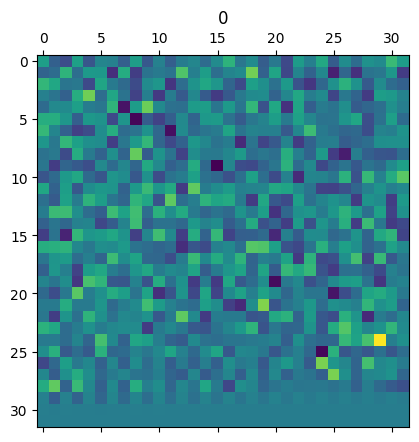

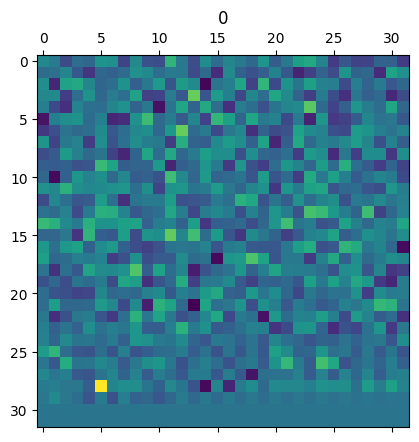

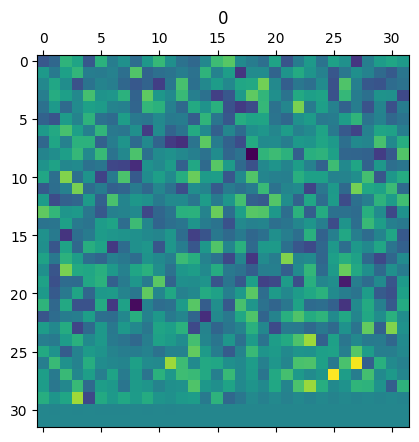

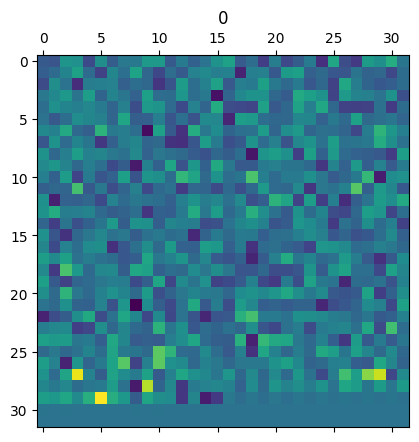

In [89]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 8)         80        
                                                                 
 average_pooling2d_15 (Aver  (None, 16, 16, 8)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 average_pooling2d_16 (Aver  (None, 8, 8, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 average_pooling2d_17 (Aver  (None, 4, 4, 32)         

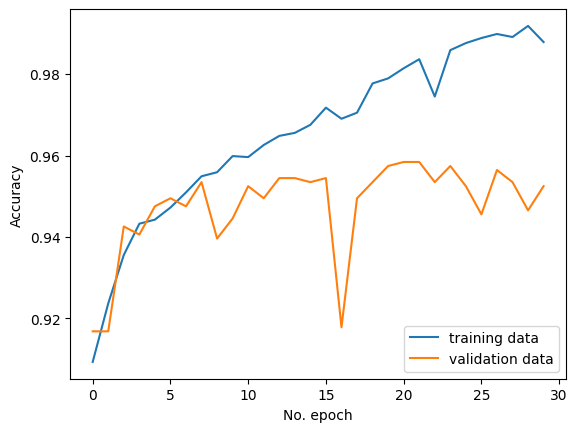

In [90]:
 model_trainning_saving([32,32],30,"tape_model_mango",train_data,train_labels,test_data,test_labels)

# ESM and Geotop

In [91]:
dgms = gdr.DiagramSelector(use=True, point_type='finite').fit_transform(embedding2_geotop)

In [92]:
dim = 1681
result = concate_embedding_geotop(mango_ebedding2,dgms,dim)

In [93]:
#splitting the dataset
num_samples = len(result)
num_train_samples = int(0.8 * num_samples)  # 80% for training, 20% for testing

# Split data and labels into training and testing sets
train_data, test_data = result[:num_train_samples], result[num_train_samples:]
train_labels, test_labels = result_signalp_mango[:num_train_samples], result_signalp_mango[num_train_samples:]

In [94]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [95]:
shape_unit=41
std_scale = skp.StandardScaler().fit(train_data)
X_normalized = std_scale.transform(train_data)
train_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [96]:
std_scale = skp.StandardScaler().fit(test_data)
X_normalized = std_scale.transform(test_data)
test_data=np.reshape(X_normalized,(X_normalized.shape[0],shape_unit,shape_unit))

In [97]:
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [98]:
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3727]
 [   1  309]]


In [99]:
train_data.shape

(4036, 41, 41, 1)

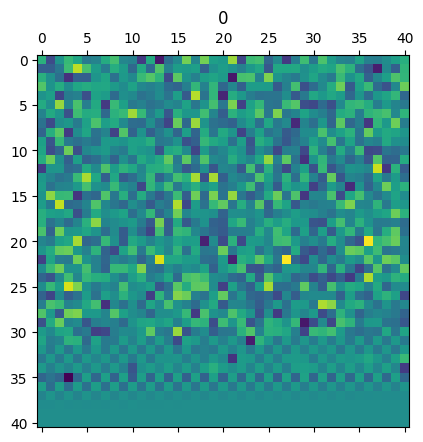

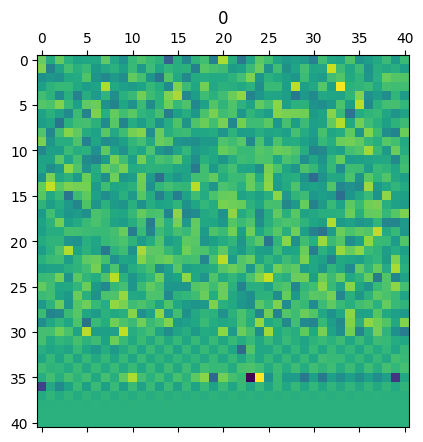

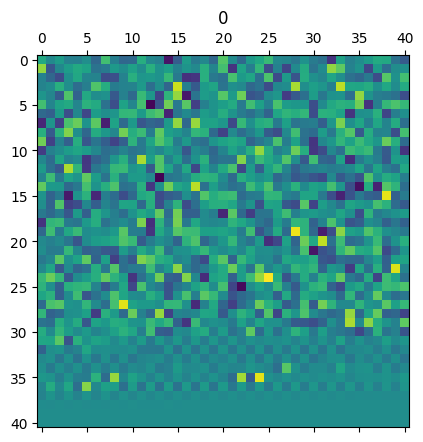

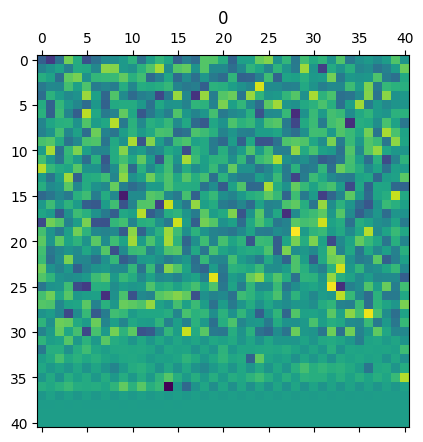

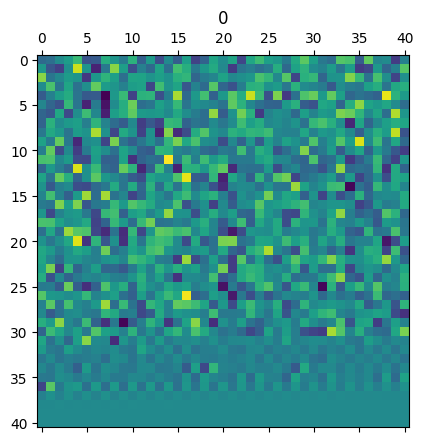

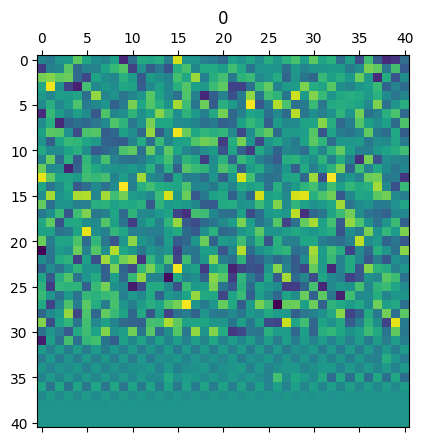

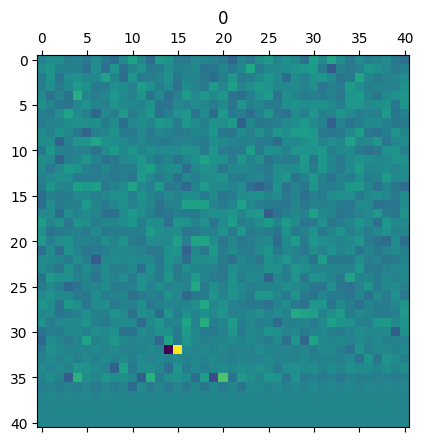

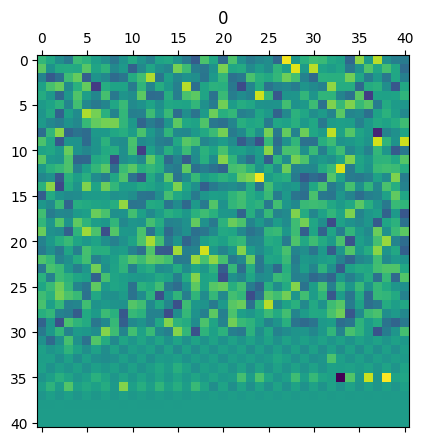

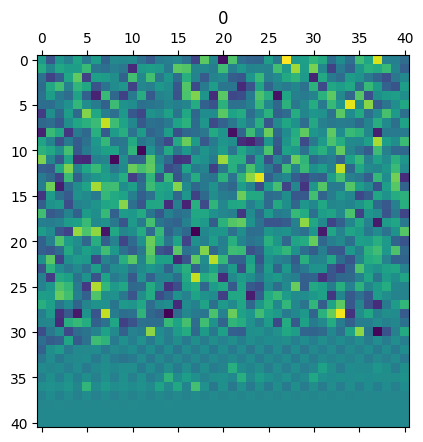

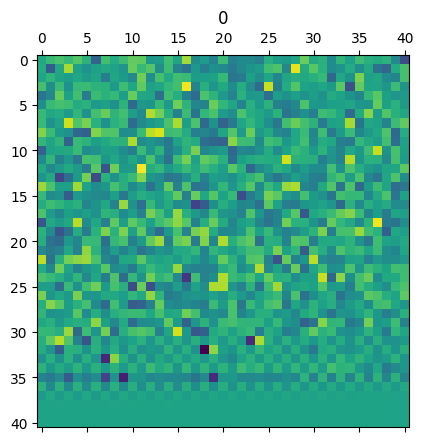

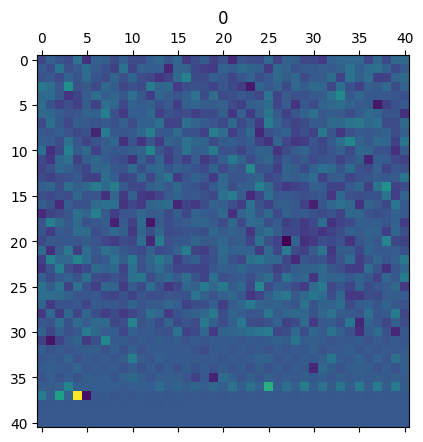

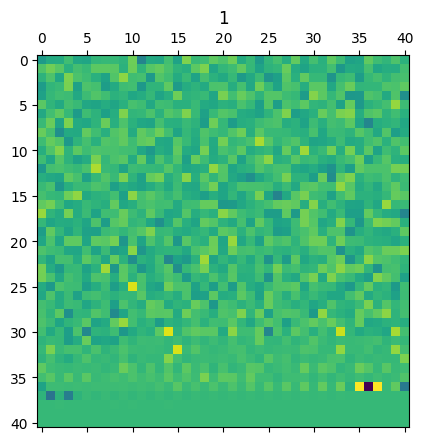

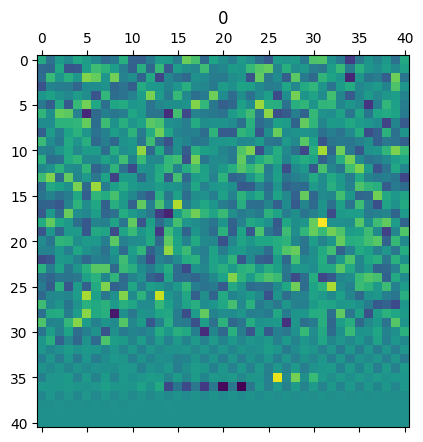

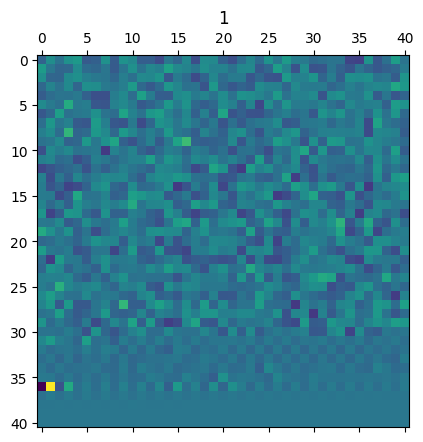

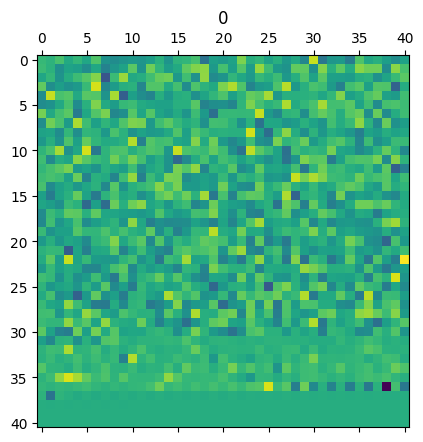

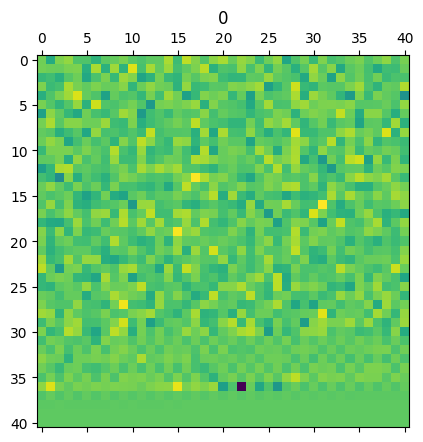

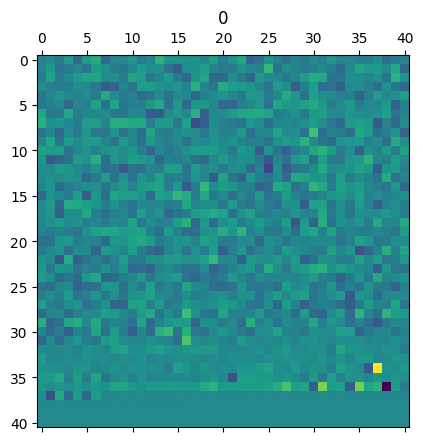

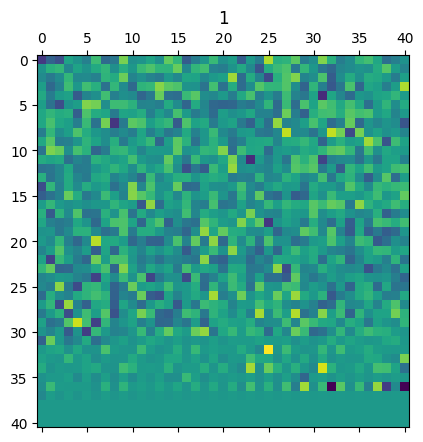

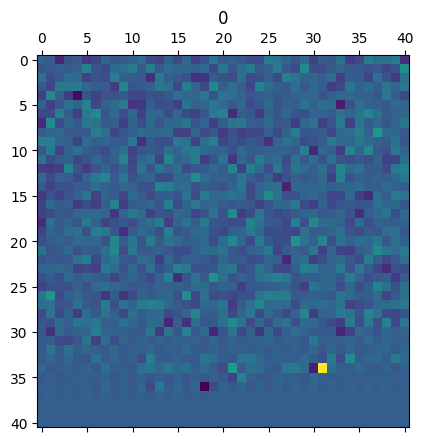

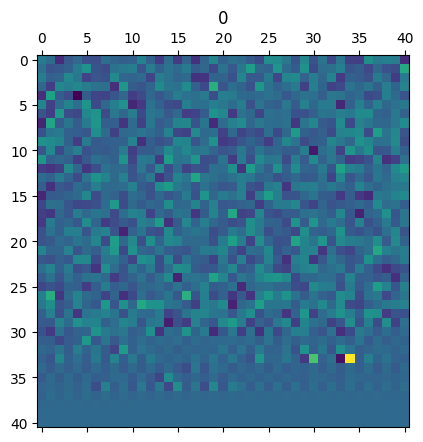

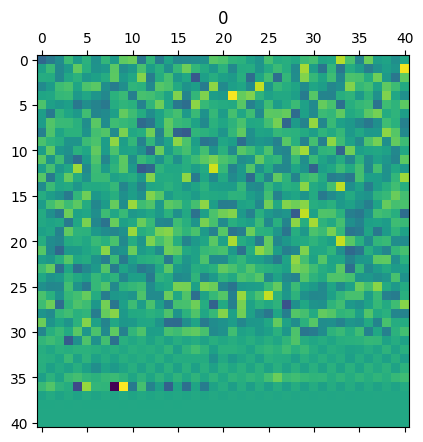

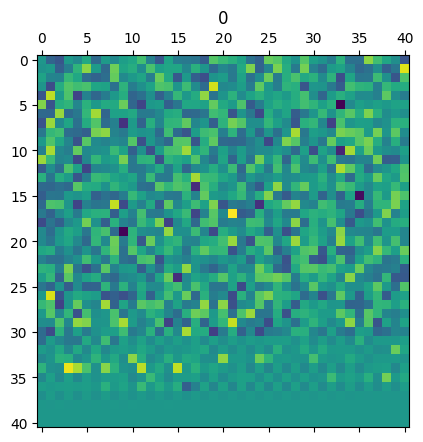

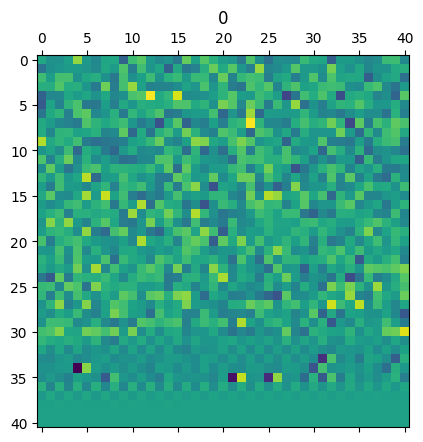

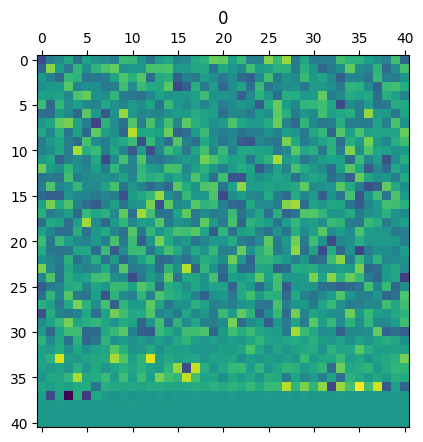

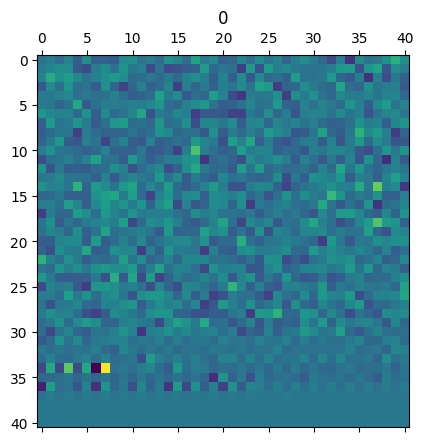

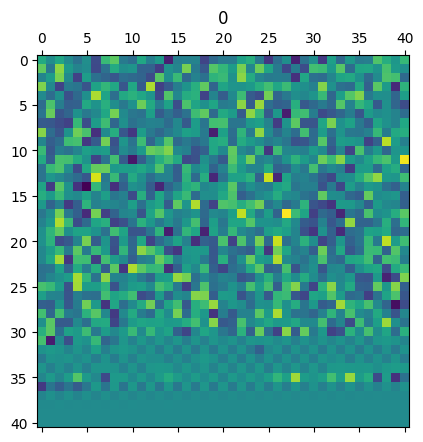

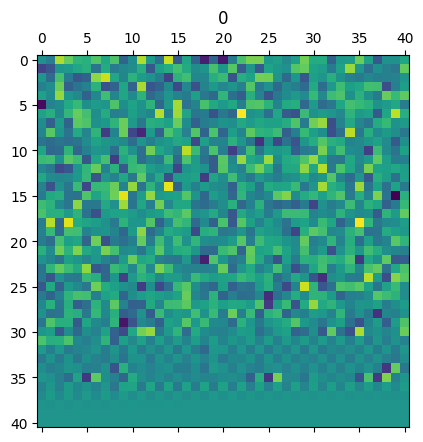

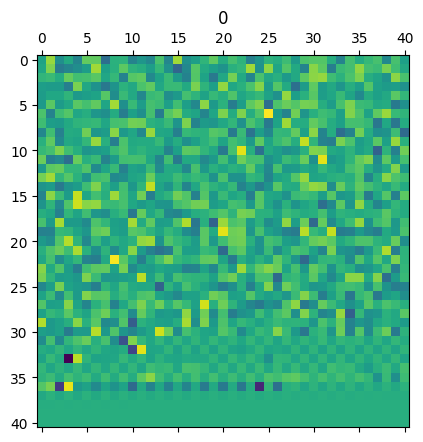

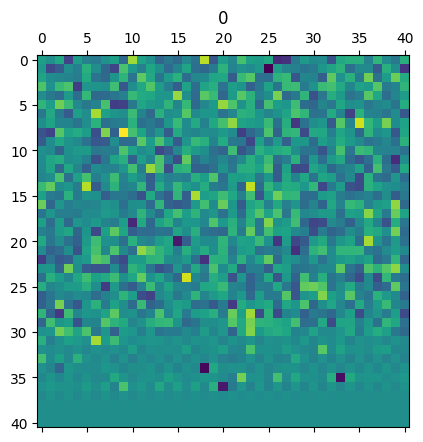

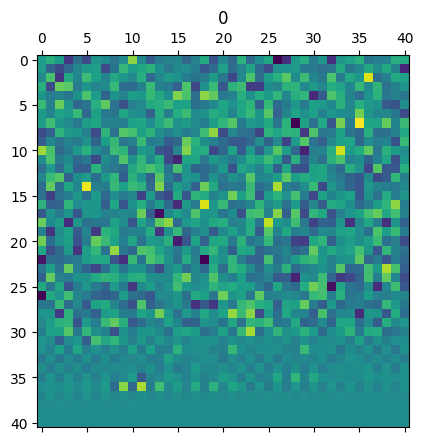

In [100]:
for i in range(30):
    plt.matshow(train_data[i])
    plt.title(train_labels[i])
    plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 41, 41, 8)         80        
                                                                 
 average_pooling2d_18 (Aver  (None, 20, 20, 8)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 16)        1168      
                                                                 
 average_pooling2d_19 (Aver  (None, 10, 10, 16)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 average_pooling2d_20 (Aver  (None, 5, 5, 32)         

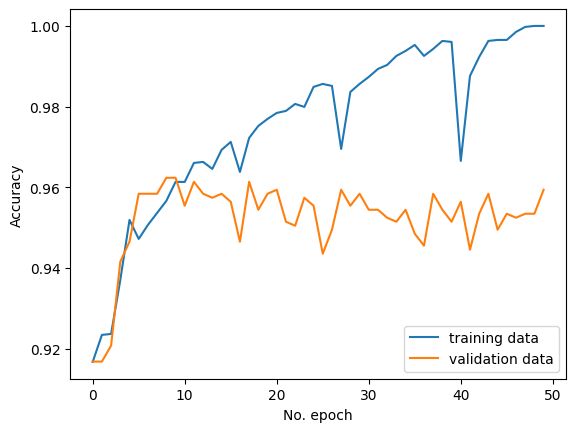

In [101]:
 model_trainning_saving([41,41],50,"esm_model_mango",train_data,train_labels,test_data,test_labels)